# LokSabha Election EDA
#By- Aarush Kumar
#Dated: August 16,2021

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

In [14]:
data = pd.read_csv('/home/aarush100616/Downloads/Projects/LokSabha Election EDA/LS_2.0.csv')

In [15]:
data

STATE     CONSTITUENCY                   NAME  WINNER PARTY  \
0         Telangana         ADILABAD         SOYAM BAPU RAO       1   BJP   
1         Telangana         ADILABAD           Godam Nagesh       0   TRS   
2         Telangana         ADILABAD          RATHOD RAMESH       0   INC   
3         Telangana         ADILABAD                   NOTA       0  NOTA   
4     Uttar Pradesh             AGRA  Satyapal Singh Baghel       1   BJP   
...             ...              ...                    ...     ...   ...   
2258    Maharashtra  YAVATMAL-WASHIM     Anil Jayram Rathod       0   IND   
2259      Telangana        ZAHIRABAD              B.B.PATIL       1   TRS   
2260      Telangana        ZAHIRABAD        MADAN MOHAN RAO       0   INC   
2261      Telangana        ZAHIRABAD     BANALA LAXMA REDDY       0   BJP   
2262      Telangana        ZAHIRABAD                   NOTA       0  NOTA   

     SYMBOL GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0     Lotus   MALE              52  52.0       ST      12th Pass   
1       Car   MALE               0  54.0       ST  Post Graduate   
2      Hand   MALE               3  52.0       ST      12th Pass   
3       NaN    NaN             NaN   NaN      NaN            NaN   
4     Lotus   MALE               5  58.0       SC      Doctorate   
...     ...    ...             ...   ...      ...            ...   
2258   SHIP   MALE               0  43.0  GENERAL  Post Graduate   
2259    Car   MALE              18  63.0  GENERAL       Graduate   
2260   Hand   MALE               0  49.0  GENERAL  Post Graduate   
2261  Lotus   MALE               3  47.0  GENERAL      12th Pass   
2262    NaN    NaN             NaN   NaN      NaN            NaN   

                                ASSETS                  LIABILITIES  \
0            Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+   
1          Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 Lacs+   
2          Rs 3,64,91,000\n ~ 3 Crore+  Rs 1,53,00,000\n ~ 1 Crore+   
3                                  NaN                          NaN   
4          Rs 7,42,74,036\n ~ 7 Crore+    Rs 86,06,522\n ~ 86 Lacs+   
...                                ...                          ...   
2258         Rs 48,90,000\n ~ 48 Lacs+    Rs 10,20,000\n ~ 10 Lacs+   
2259  Rs 1,28,78,51,556\n ~ 128 Crore+  Rs 1,15,35,000\n ~ 1 Crore+   
2260     Rs 90,36,63,001\n ~ 90 Crore+                     Rs 0\n ~   
2261       Rs 5,85,77,327\n ~ 5 Crore+    Rs 52,50,000\n ~ 52 Lacs+   
2262                               NaN                          NaN   

      GENERAL\nVOTES  POSTAL\nVOTES  TOTAL\nVOTES  \
0             376892            482        377374   
1             318665            149        318814   
2             314057            181        314238   
3              13030              6         13036   
4             644459           2416        646875   
...              ...            ...           ...   
2258           14661             25         14686   
2259          434066            178        434244   
2260          427900            115        428015   
2261          138731            216        138947   
2262           11138              2         11140   

      OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0                                 25.330684   
1                                 21.399929   
2                                 21.092771   
3                                  0.875023   
4                                 33.383823   
...                                     ...   
2258                               0.766419   
2259                              28.975369   
2260                              28.559732   
2261                               9.271379   
2262                               0.743328   

      OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                     35.468248         1489790  
1                                     29.964370         1489790  
2                  

In [16]:
#Rename Multiple columns in a dataframe.
data.rename(columns = {'TOTAL\nVOTES':'TOTALVOTES','CRIMINAL\nCASES':'CRIMINALCASES'}, inplace = True)

In [17]:
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINALCASES                                245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTALVOTES                                     0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [18]:
data.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [19]:
#Replace multiple words in a column for certain words.
def update_education(row):
    if row['EDUCATION'] in ['Illiterate','Not Available']:
        return 'Iliterate/NA'
    if row['EDUCATION'] in ['5th Pass','8th Pass','10th Pass','12th Pass']:
        return 'School Level'
    elif row['EDUCATION'] in ['Graduate Professional','Graduate']: 
        return 'Graduate'
    elif row['EDUCATION'] in ['Post Graduate\n','Post Graduate', 'Doctorate']:
        return 'Post Graduate/Doctorate'
    else:
        'Literate'
        
data['Education_New'] = data.apply(update_education,axis =1)

In [20]:
data['CRIMINALCASES'] = data['CRIMINALCASES'].replace({'Not Available': 0})
data['CRIMINALCASES'] = data['CRIMINALCASES'].fillna(0)

In [21]:
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINALCASES                                  0
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTALVOTES                                     0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
Education_New                                325
dtype: int64

In [22]:
data.Education_New.unique()

array(['School Level', 'Post Graduate/Doctorate', None, 'Graduate',
       'Iliterate/NA'], dtype=object)

In [23]:
#Replace NA in Education_New wth Iliterate/NA.
data['Education_New'].fillna('Iliterate/NA', inplace=True)

In [24]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(*args, **kwargs)
    Alias for :func:`set_theme`, which is the preferred interface.



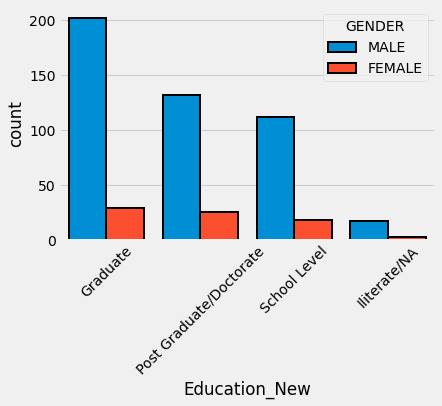

In [25]:
#Sort Countplot by using Order
#Filter applied on column 'Winner', for not equal to 0. And with that filter applied, count of column 'Education_New' is applied.
sns.countplot(x=data[data['WINNER'] != 0]['Education_New'],               
              order=data[data['WINNER'] != 0]['Education_New'].value_counts().index,hue = data['GENDER'], saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=2)
plt.xticks(rotation=45)
plt.show()

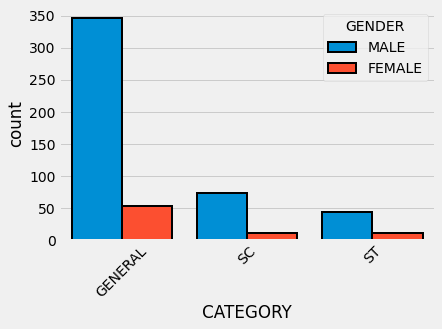

In [26]:
sns.countplot(x=data[data['WINNER'] != 0]['CATEGORY'],               
              order=data[data['WINNER'] != 0]['CATEGORY'].value_counts().index,hue = data['GENDER'], saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=2)
plt.xticks(rotation=45)
plt.show()

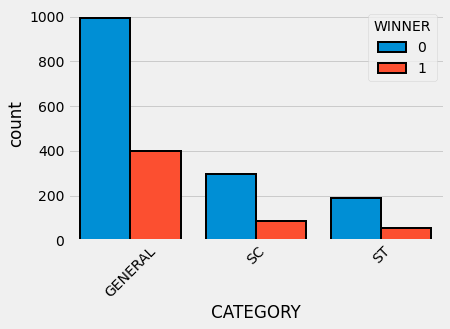

In [27]:
#Countplot of varies category, with a hue of winner.
sns.countplot(x=data['CATEGORY'],               
              order=data['CATEGORY'].value_counts().index,hue = data['WINNER'], saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=2)
plt.xticks(rotation=45)
plt.show()

In [28]:
#Filter for value not equal to 0 in column Winner, and then count of winner of each category.
new_df = data[data['WINNER'] != 0].CATEGORY.value_counts().reset_index() #Use .reset.index() to store it as a DF
new_df 

index  CATEGORY
0  GENERAL       399
1       SC        85
2       ST        55

In [29]:
#Rename of Columns
new_df.rename(columns = {'index':'Category','CATEGORY':'Count'}, inplace = True)
new_df 

Category  Count
0  GENERAL    399
1       SC     85
2       ST     55

In [30]:
#Set Category as index so Pie Chart can use it as a label.
new_df.set_index('Category', inplace= True)

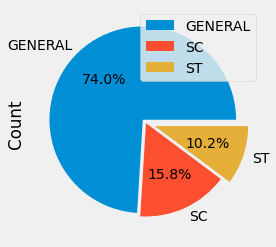

In [31]:
new_df.plot.pie(y='Count', explode = (0.05,0,0.1),autopct='%1.1f%%')

In [32]:
#Filter for value not equal to 0 in column Winner, and then count of win of each Party and save as a list.
new_df2 = data[data['WINNER'] != 0].PARTY.value_counts()
new_df2

BJP       300
INC        52
DMK        23
AITC       22
YSRCP      22
SHS        18
JD(U)      16
BSP        11
BJD        11
TRS         9
LJP         6
NCP         5
CPI(M)      5
SP          5
IND         4
IUML        3
TDP         3
JKN         3
AIMIM       2
SAD         2
ADAL        2
MNF         1
AAP         1
AIUDF       1
VCK         1
JMM         1
NDPP        1
RSP         1
AJSUP       1
KEC(M)      1
JD(S)       1
NPEP        1
NPF         1
RLTP        1
SKM         1
AIADMK      1
Name: PARTY, dtype: int64

Text(0.5, 1.0, 'Wins per Party')

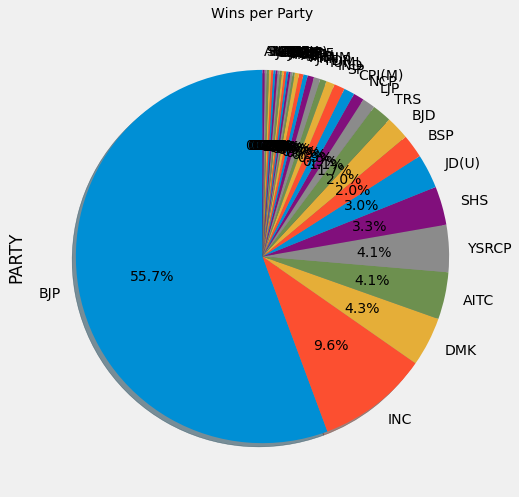

In [33]:
pie, ax = plt.subplots(figsize=[30,8]) #To Size the Pie Chart
new_df2.plot.pie(x=new_df2,autopct='%1.1f%%',startangle=90, shadow=True, legend = False)
plt.title("Wins per Party", fontsize=14)

In [34]:
top_20parties = pd.Series(data['PARTY'].value_counts().head(21))
top_20parties

BJP       420
INC       413
NOTA      245
IND       201
BSP       163
CPI(M)    100
VBA        47
AITC       47
SP         39
NTK        38
MNM        36
SHS        26
AAP        25
TDP        25
YSRCP      25
DMK        23
RJD        21
NCP        21
AIADMK     21
BJD        21
JnP        20
Name: PARTY, dtype: int64

In [35]:
top_20parties = top_20parties.index.drop(['IND'])
top_20parties

Index(['BJP', 'INC', 'NOTA', 'BSP', 'CPI(M)', 'VBA', 'AITC', 'SP', 'NTK',
       'MNM', 'SHS', 'AAP', 'TDP', 'YSRCP', 'DMK', 'RJD', 'NCP', 'AIADMK',
       'BJD', 'JnP'],
      dtype='object')

In [36]:
#Parties groupby most seats won, Top 5.
Vote_share=data.groupby("PARTY")["WINNER"].sum().nlargest(5).index.tolist()
Vote_share

['BJP', 'INC', 'DMK', 'AITC', 'YSRCP']

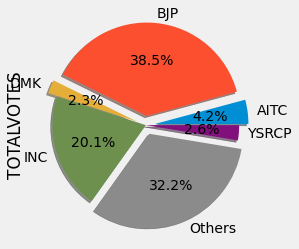

In [37]:
def fuc(row):
    if row["PARTY"] not in Vote_share:
        return("Others")
    else:
        return row['PARTY']
data['Party_new']=data.apply(fuc,axis=1)
data.head()
Top5=data.groupby("Party_new")["TOTALVOTES"].sum()
explode = (0.1,0.1,0.1,0,0.1,0)
Top5_index=Top5.index
Top5_label=Top5.values
Top5.plot.pie(labels=Top5_index,
        shadow=True, startangle=0,explode = explode,autopct='%1.1f%%');